## Business Problem:
#### Customer churn is the loss of clients or customers for companies.
The purpose of this study is to build and customize prediction models to classify whether a customer is going to churn or not.
Variables:
+ Surname : Customers' surname
+ CreditScore : Credit score achieved
+ Geography : Germany, France, Spain
+ Gender : Female, Male
+ Age : Customers' age
+ Tenure : Number of years
+ Balance : Money
+ NumOfProducts : Number of bank products used
+ HasCrCard : The state of having credit card or not
+ IsActiveMember : The state of active membership
+ EstimatedSalary :
+ Exited : Churn or not

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-predictions-personal/Churn_Predictions.csv


## Installing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split,cross_val_score
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor # çok değişkenli aykırı gözlem incelemesi
from sklearn.preprocessing import scale,StandardScaler, MinMaxScaler,Normalizer,RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'


pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

## Data Understanding & Explatory Data Analysis

In [3]:
df = pd.read_csv("../input/churn-predictions-personal/Churn_Predictions.csv", index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


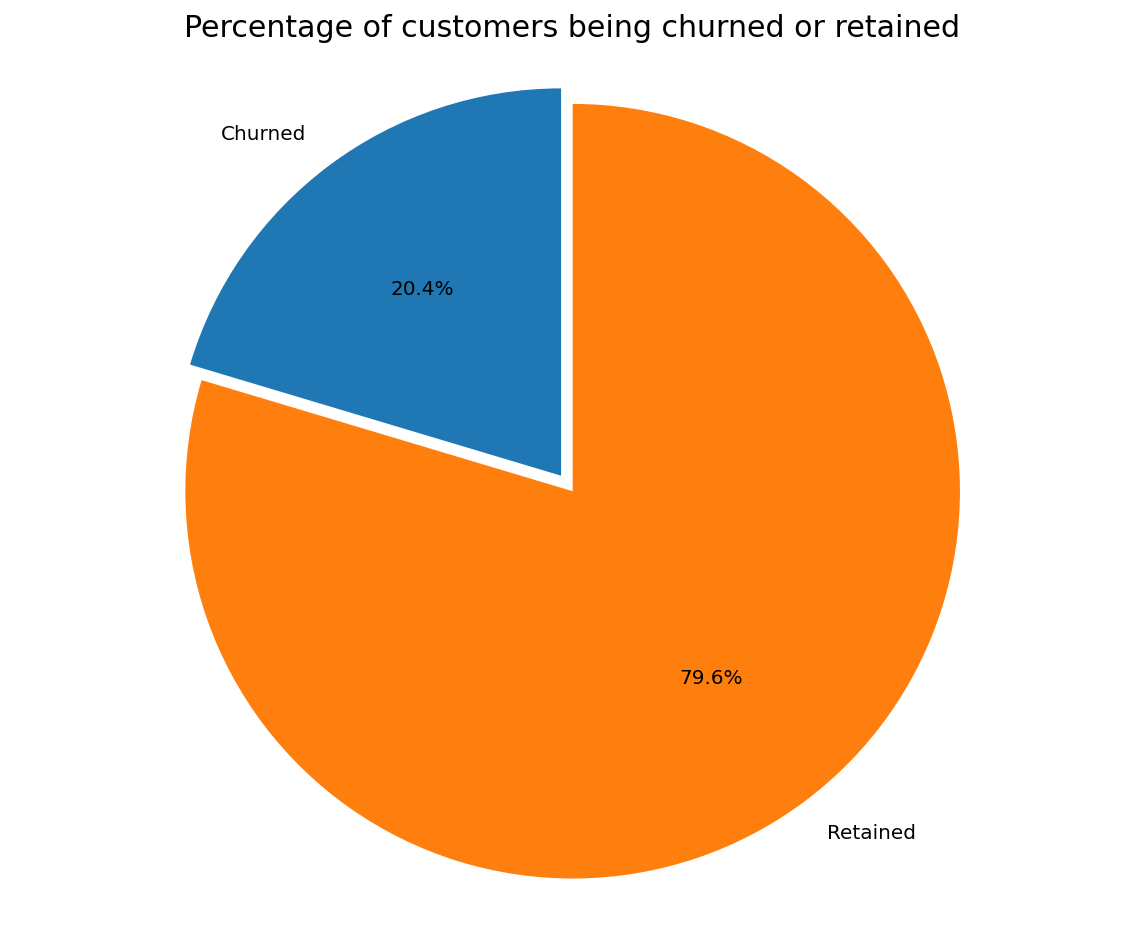

In [6]:
# Displaying the percentage of customers being churn or retain
labels = 'Churned', 'Retained'
sizes = [df.Exited[df['Exited'] == 1].count(), df.Exited[df['Exited'] == 0].count()]
explode = (0, 0.05)
fig1, ax1 = plt.subplots(figsize = (10, 8))
ax1.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%',
        shadow = False, startangle = 90)
ax1.axis('equal')
plt.title("Percentage of customers being churned or retained", size = 15)
plt.show()

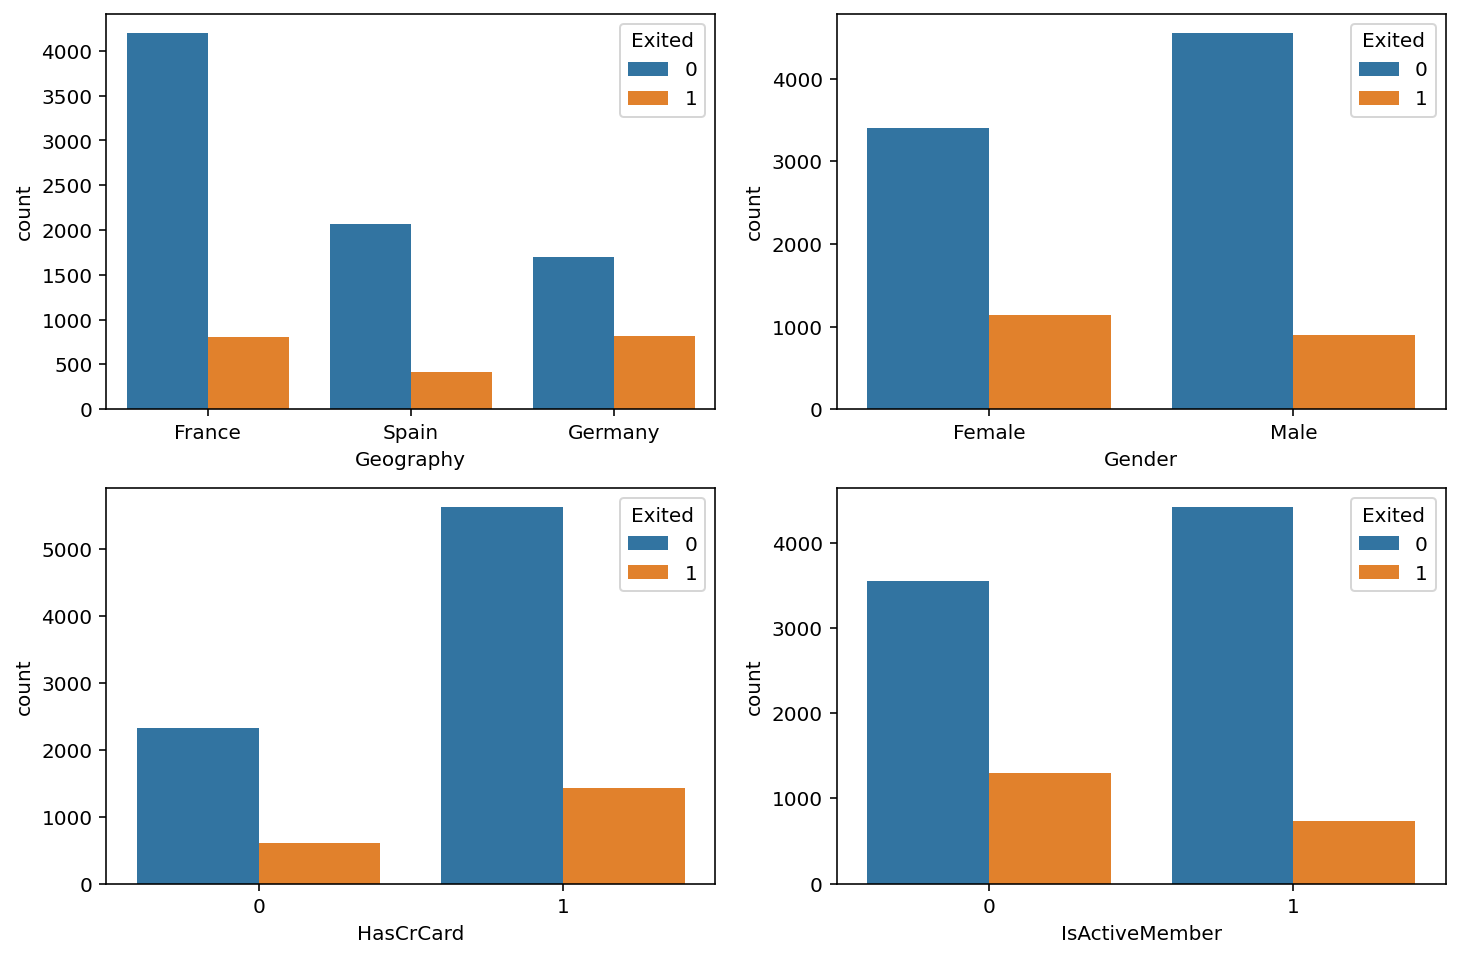

In [7]:
# Displaying the churn status of customers by categorical variables  
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1]);

The proportion of female customers being churned is more than that of male counterparts.

Interestingly, customers having credit cards are more likely to be churned compared to customers who do not have credit cards.

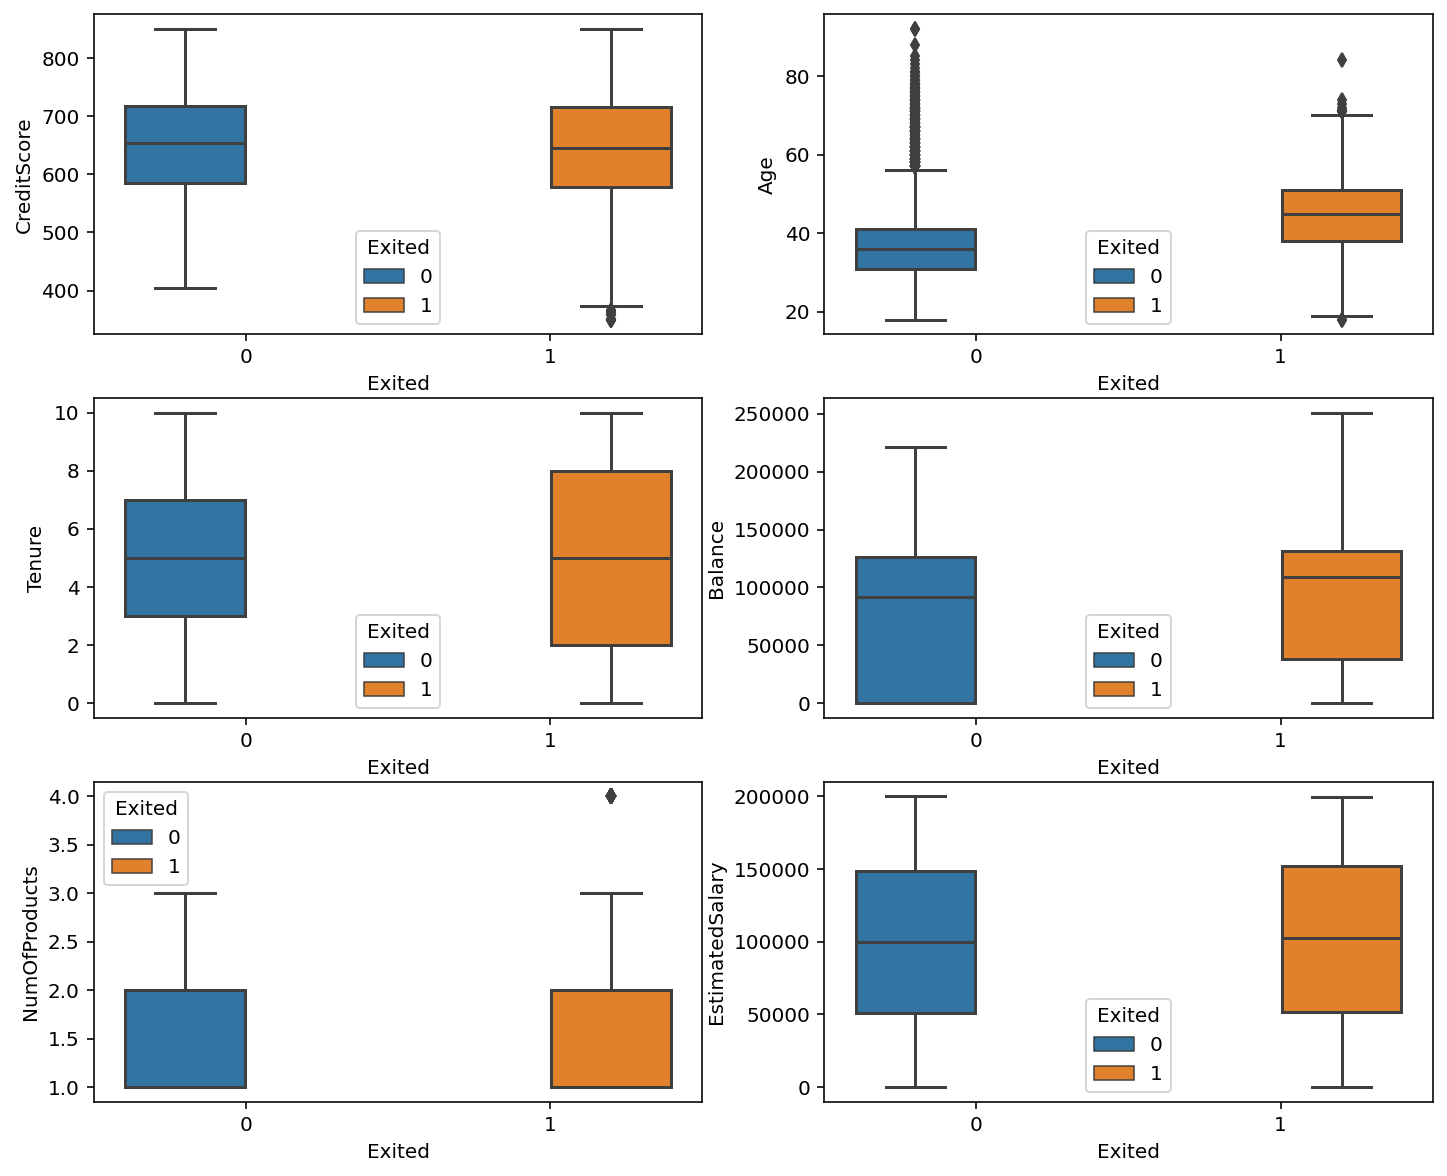

In [8]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 10))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1]);

It seems that age plays an important role in the status of being churned. 

Older customers are more likely to be churned than young customers.

Another interesting finding this boxplot states is that having more balance lead to customers exit more

## FEATURE ENGINEERING AND DATA PREPERATION FOR MODEL DEVELOPMENT


In [9]:
Age_Cat = pd.Series(["18-25", "26-33", "34-41", "42-49", "50-57", "58 and older"], dtype = "category")
df["Age_Cat"] = Age_Cat
df.loc[df["Age"] <= 25, "Age_Cat"] = Age_Cat[0]
df.loc[(df["Age"] > 25) & (df["Age"] <= 33), "Age_Cat"] = Age_Cat[1]
df.loc[(df["Age"] > 33) & (df["Age"] <= 41), "Age_Cat"] = Age_Cat[2]
df.loc[(df["Age"] > 41) & (df["Age"] <= 49), "Age_Cat"] = Age_Cat[3]
df.loc[(df["Age"] > 49) & (df["Age"] <= 57), "Age_Cat"] = Age_Cat[4]
df.loc[df["Age"] > 57 ,"Age_Cat"] = Age_Cat[5]

df['new_tenure'] = df.Tenure / df.Age

df['balance_salary_ratio'] = df.Balance/df.EstimatedSalary

df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Cat,new_tenure,balance_salary_ratio
RowNumber,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,42-49,0.047619,0.000000
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,34-41,0.024390,0.744677
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,42-49,0.190476,1.401375
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,34-41,0.025641,0.000000
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,42-49,0.046512,1.587055


In [10]:
cont_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'new_tenure', 'balance_salary_ratio']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography','Gender', 'Age_Cat']
df = df[['Exited'] + cont_vars + cat_vars]
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,new_tenure,balance_salary_ratio,HasCrCard,IsActiveMember,Geography,Gender,Age_Cat
RowNumber,,,,,,,,,,,,,,
1,1,619,42,2,0.00,1,101348.88,0.047619,0.000000,1,1,France,Female,42-49
2,0,608,41,1,83807.86,1,112542.58,0.024390,0.744677,0,1,Spain,Female,34-41
3,1,502,42,8,159660.80,3,113931.57,0.190476,1.401375,1,0,France,Female,42-49
4,0,699,39,1,0.00,2,93826.63,0.025641,0.000000,0,0,France,Female,34-41
5,0,850,43,2,125510.82,1,79084.10,0.046512,1.587055,1,1,Spain,Female,42-49


In [11]:
# Gender variable was decoded as dummy by lable encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Geography and Age_Cat Variables were recoded as dummy
df = pd.get_dummies(df, columns =["Geography","Age_Cat"], drop_first = True)

df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,new_tenure,balance_salary_ratio,HasCrCard,IsActiveMember,Gender,Geography_Germany,Geography_Spain,Age_Cat_26-33,Age_Cat_34-41,Age_Cat_42-49,Age_Cat_50-57,Age_Cat_58 and older
RowNumber,,,,,,,,,,,,,,,,,,,
1,1,619,42,2,0.00,1,101348.88,0.047619,0.000000,1,1,0,0,0,0,0,1,0,0
2,0,608,41,1,83807.86,1,112542.58,0.024390,0.744677,0,1,0,0,1,0,1,0,0,0
3,1,502,42,8,159660.80,3,113931.57,0.190476,1.401375,1,0,0,0,0,0,0,1,0,0
4,0,699,39,1,0.00,2,93826.63,0.025641,0.000000,0,0,0,0,0,0,1,0,0,0
5,0,850,43,2,125510.82,1,79084.10,0.046512,1.587055,1,1,0,0,1,0,0,1,0,0


In [12]:
categorical_df = df[['HasCrCard', 'IsActiveMember', 'Gender', 'Geography_Germany', 
                     'Geography_Spain', 'Age_Cat_26-33', 'Age_Cat_34-41', 'Age_Cat_42-49', 
                     'Age_Cat_50-57', 'Age_Cat_58 and older']]

continues_df = df[['Age','Tenure','CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'new_tenure', 'balance_salary_ratio']]

In [13]:
cols = continues_df.columns
index = continues_df.index

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(continues_df)
continues_df = pd.DataFrame(scaled, columns = cols, index = index)

continues_df.head()

,Age,Tenure,CreditScore,Balance,NumOfProducts,EstimatedSalary,new_tenure,balance_salary_ratio
RowNumber,,,,,,,,
1,0.324324,0.2,0.538,0.000000,0.000000,0.506735,0.085714,0.000000
2,0.310811,0.1,0.516,0.334031,0.000000,0.562709,0.043902,0.000070
3,0.324324,0.8,0.304,0.636357,0.666667,0.569654,0.342857,0.000132
4,0.283784,0.1,0.698,0.000000,0.333333,0.469120,0.046154,0.000000
5,0.337838,0.2,1.000,0.500246,0.000000,0.395400,0.083721,0.000150


In [14]:
x = pd.concat([continues_df,categorical_df], axis = 1)
x.head()

,Age,Tenure,CreditScore,Balance,NumOfProducts,EstimatedSalary,new_tenure,balance_salary_ratio,HasCrCard,IsActiveMember,Gender,Geography_Germany,Geography_Spain,Age_Cat_26-33,Age_Cat_34-41,Age_Cat_42-49,Age_Cat_50-57,Age_Cat_58 and older
RowNumber,,,,,,,,,,,,,,,,,,
1,0.324324,0.2,0.538,0.000000,0.000000,0.506735,0.085714,0.000000,1,1,0,0,0,0,0,1,0,0
2,0.310811,0.1,0.516,0.334031,0.000000,0.562709,0.043902,0.000070,0,1,0,0,1,0,1,0,0,0
3,0.324324,0.8,0.304,0.636357,0.666667,0.569654,0.342857,0.000132,1,0,0,0,0,0,0,1,0,0
4,0.283784,0.1,0.698,0.000000,0.333333,0.469120,0.046154,0.000000,0,0,0,0,0,0,1,0,0,0
5,0.337838,0.2,1.000,0.500246,0.000000,0.395400,0.083721,0.000150,1,1,0,0,1,0,0,1,0,0


In [15]:
y = df['Exited']

## MODEL DEVELOPMENT

LR: 0.830000 (0.015672)
KNN: 0.827000 (0.016828)
CART: 0.788625 (0.014180)
RF: 0.865000 (0.013264)
SVM: 0.829625 (0.018244)
GBM: 0.866875 (0.014505)
XGBoost: 0.855625 (0.015137)
LightGBM: 0.862625 (0.013947)


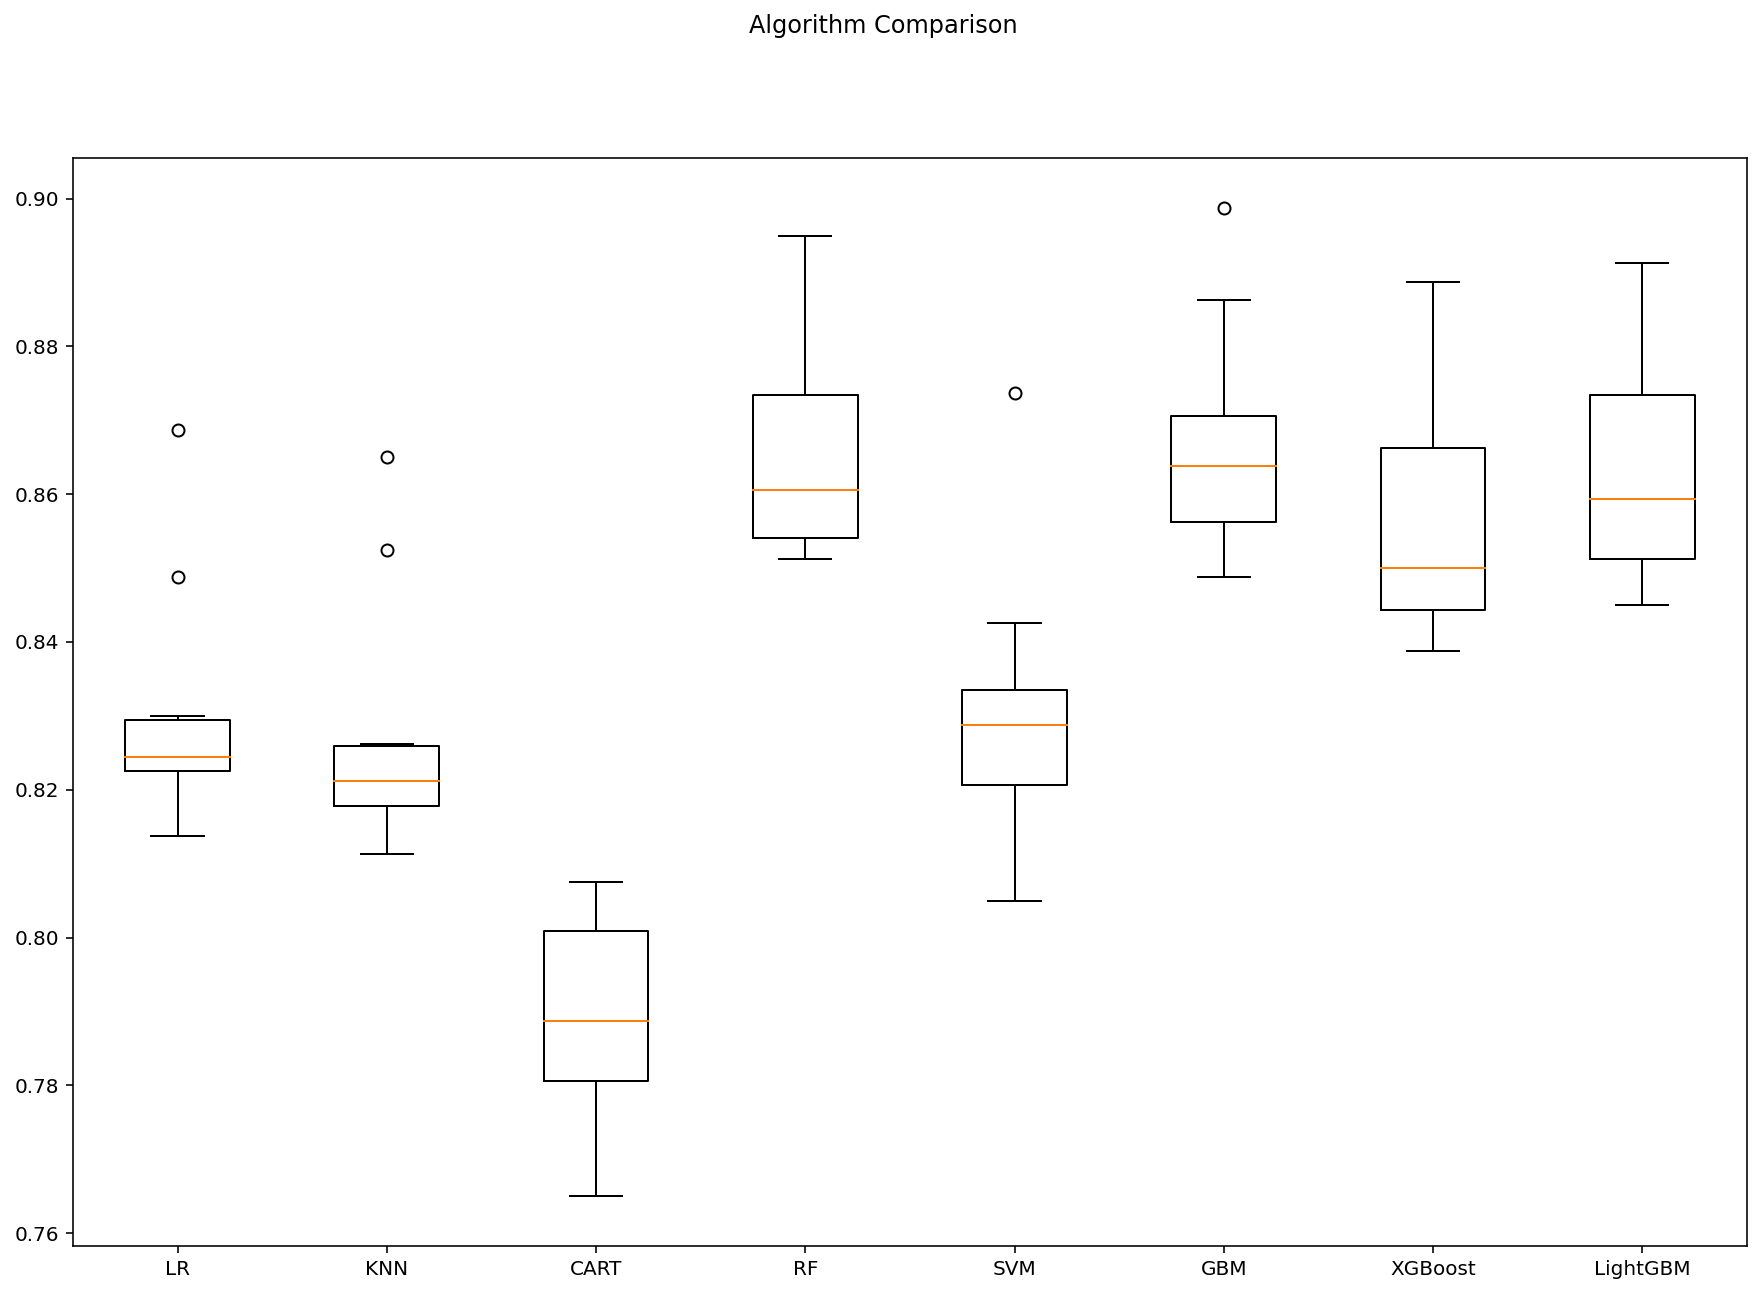

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 12345)

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('GBM',GradientBoostingClassifier()))
models.append(('XGBoost',XGBClassifier()))
models.append(('LightGBM',LGBMClassifier()))

results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
              
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## FINDING BEST PARAMETERS FOR MODEL OPTIMIZATION

### RANDOM FORESTS

In [17]:
rf_params = {"n_estimators" :[120,300,500], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,100],
            "max_depth": [5,8,25,30,None]}
gs_cv = GridSearchCV(model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(x_train, y_train)
gs_cv.best_params_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  7.9min finished


{'max_depth': 25,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 120}

### LIGHT GBM

In [18]:
light_gbm_params = {"learning_rate": [0.01, 0.03, 0.05],
              "n_estimators": [1000, 1500],
              "max_depth":[8,15]}
gs_cv = GridSearchCV(model, 
                     light_gbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(x_train, y_train)
gs_cv.best_params_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.3min finished


{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000}

### GBM

In [19]:
gbm_params = {"learning_rate": [0.01, 0.03, 0.05],
              "n_estimators": [500, 1000, 1500],}
gs_cv = GridSearchCV(model, 
                     gbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(x_train, y_train)
gs_cv.best_params_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.4min finished


{'learning_rate': 0.01, 'n_estimators': 500}

## FINAL MODEL DEVELOPMENT

RF: 0.862250 (0.012891)
LightGBM: 0.862375 (0.013800)
GBM: 0.865125 (0.015365)


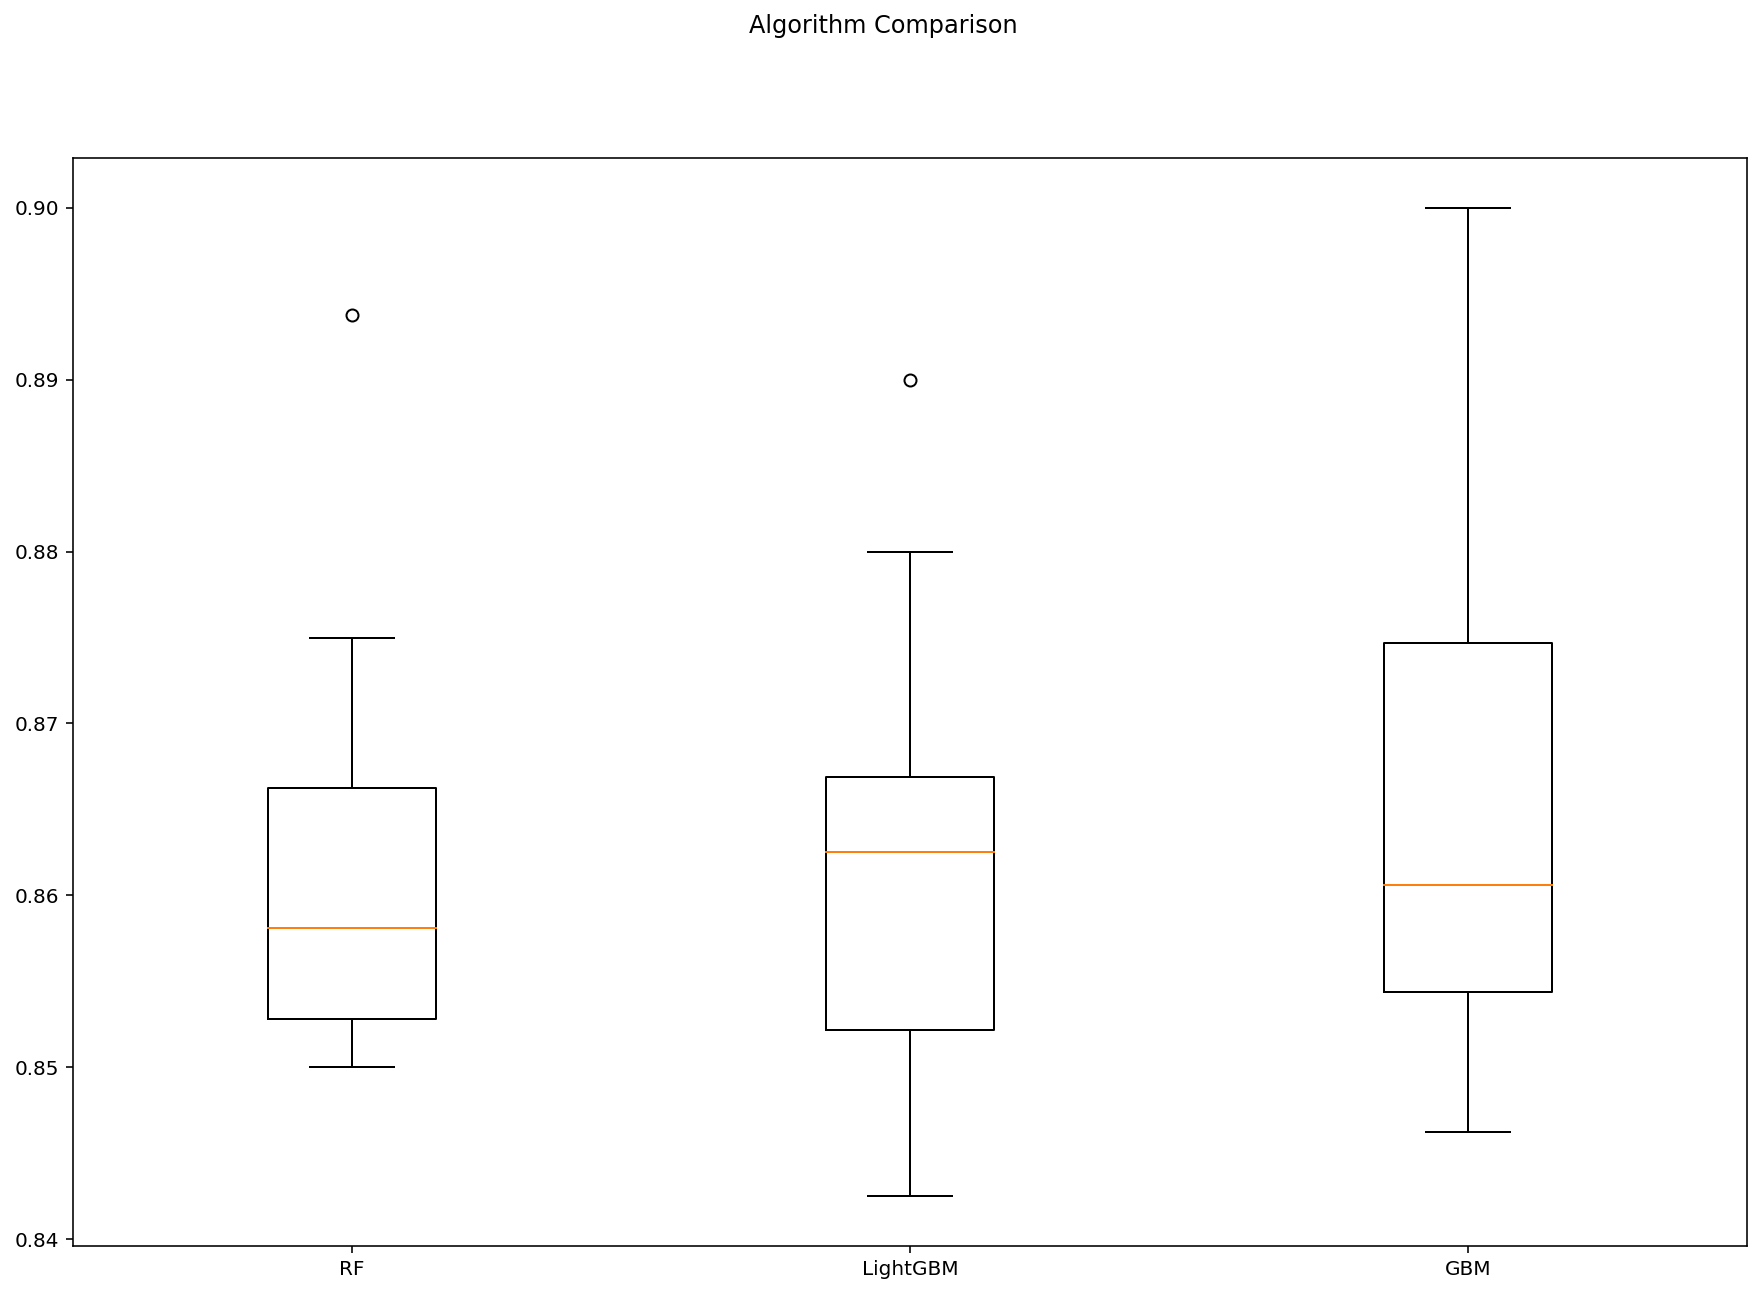

In [20]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 25, max_features = 3, min_samples_split = 2, n_estimators = 120)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 8, n_estimators = 1000)))
models.append(('GBM',GradientBoostingClassifier(random_state = 12345, learning_rate = 0.01, n_estimators = 500)))

results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
              
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()